
# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [55]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'


## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }```

In [56]:
with open('sat_scores.csv','r') as f:
    rows=[row for row in csv.reader(f)]
    header=rows[0]
    data1=rows[1:]

sat_dic={}
for i in range(len(header)):
    sat_dic[header[i]]=[(row[i]) if row[i].isdigit() else row[i] for row in data1]
                        #^ add float before (row[i]) to convert strings into type int/float data where possible

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [57]:
data_from_dic=pd.DataFrame.from_dict(sat_dic)
data=pd.read_csv('sat_scores.csv')
print(data.dtypes)
print(data_from_dic.dtypes)
#pd.read_csv automatically converts string into numerical data (type int or float) where possible 
#pd.DataFrame.from_dict does not automatically convert strings into numerical data

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object
State     object
Rate      object
Verbal    object
Math      object
dtype: object


In [58]:
#repeat creation of dataframe from dictionary, this time converting string into numerical data where possible
with open('sat_scores.csv','r') as f:
    rows=[row for row in csv.reader(f)]
    header=rows[0]
    data1=rows[1:]

sat_dic={}
for i in range(len(header)):
    sat_dic[header[i]]=[float(row[i]) if row[i].isdigit() else row[i] for row in data1]
    
data_from_dic=pd.DataFrame.from_dict(sat_dic)

In [59]:
#Compare every element of both data frames to give matching data frame, list unique values of each column
for column in data.columns:
    print(column, (data_from_dic==data)[column].unique())
#Shows that for each column True is the only unque value i.e. values in dataframes are identical

State [ True]
Rate [ True]
Verbal [ True]
Math [ True]


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [60]:
data.head(10)
#The dataframe shows the mean Verbal and Math SAT scores and the rate of participation (percent taking SAT)
#for each state.

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501



## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

## SAT Data set

**Data Set Characteristics:**  

    :Number of Instances: 52 

    :Number of Attributes: 4 numeric/categorical predictive.
    
    :Attribute Information (in order):
        State: State
        Rate: Percent taking SAT
        Verbal: Mean verbal score 
        Math: Mean math score 
        
    :Missing Attribute Values: None
    
    :Source:National Data set

    Notes:
    Data sorted by Rate (descending)
    Math and Verbal tests are scored out of 800 
    Includes Washington DC as state (denoted by DC)
    Includes All which denotes entire population 


## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

In [62]:
#Do not want to include the ALL row in our by state analysis
#remove the ALL row and assign it to data_all in case we need it later
data_all=data.iloc[51,:]
data=data.iloc[:51,:]


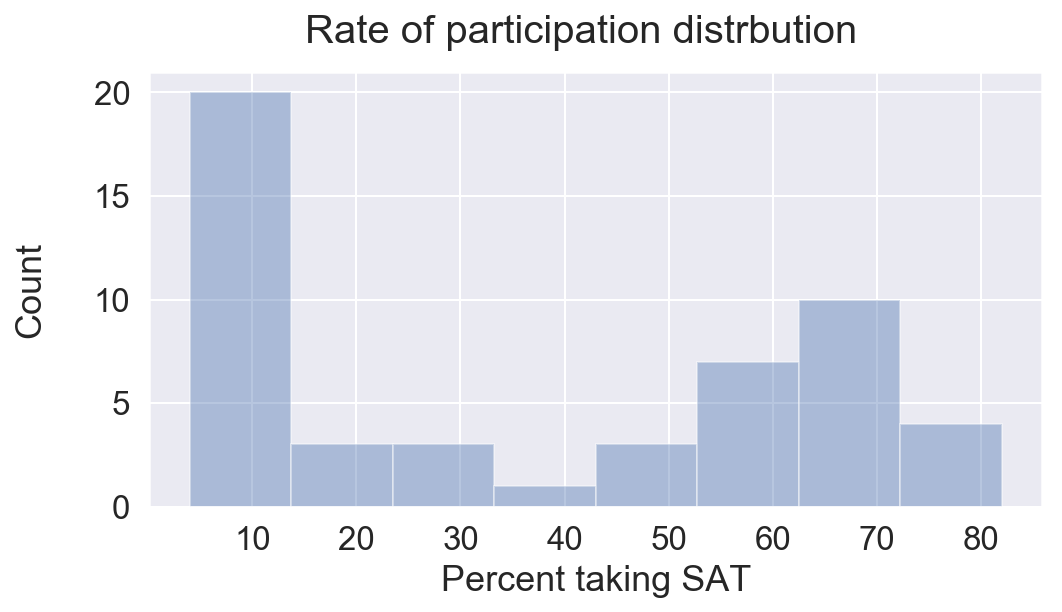

In [63]:
fig, ax = plt.subplots(figsize=(8, 4))

fig.suptitle('Rate of participation distrbution', fontsize=20)
ax.set_ylabel('Count\n', fontsize=18)
sns.distplot(data['Rate'], bins=8, kde=False, axlabel= "Percent taking SAT")

plt.show()

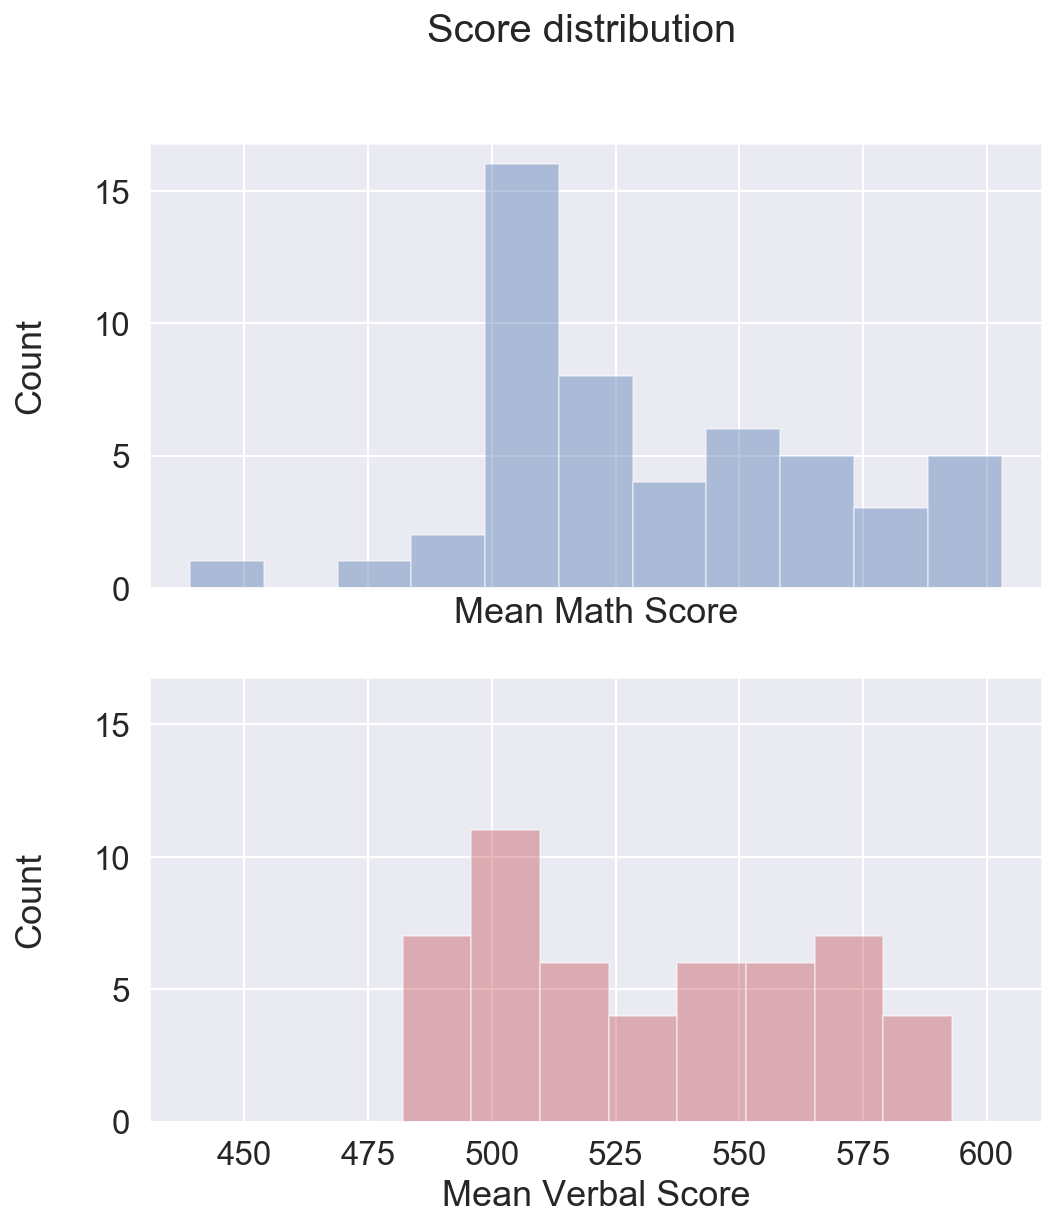

In [64]:
fig, ax = plt.subplots(nrows=2,figsize=(8, 9), sharey=True, sharex=True)

fig.suptitle('Score distribution', fontsize=20)

sns.distplot(data['Math'], bins=11, kde=False, ax=ax[0], axlabel='Mean Math Score')
ax[0].set_ylabel('Count\n', fontsize=18)

sns.distplot(data['Verbal'], bins=8, kde=False, ax=ax[1], color='r', axlabel='Mean Verbal Score')
ax[1].set_ylabel('Count\n', fontsize=18)

plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

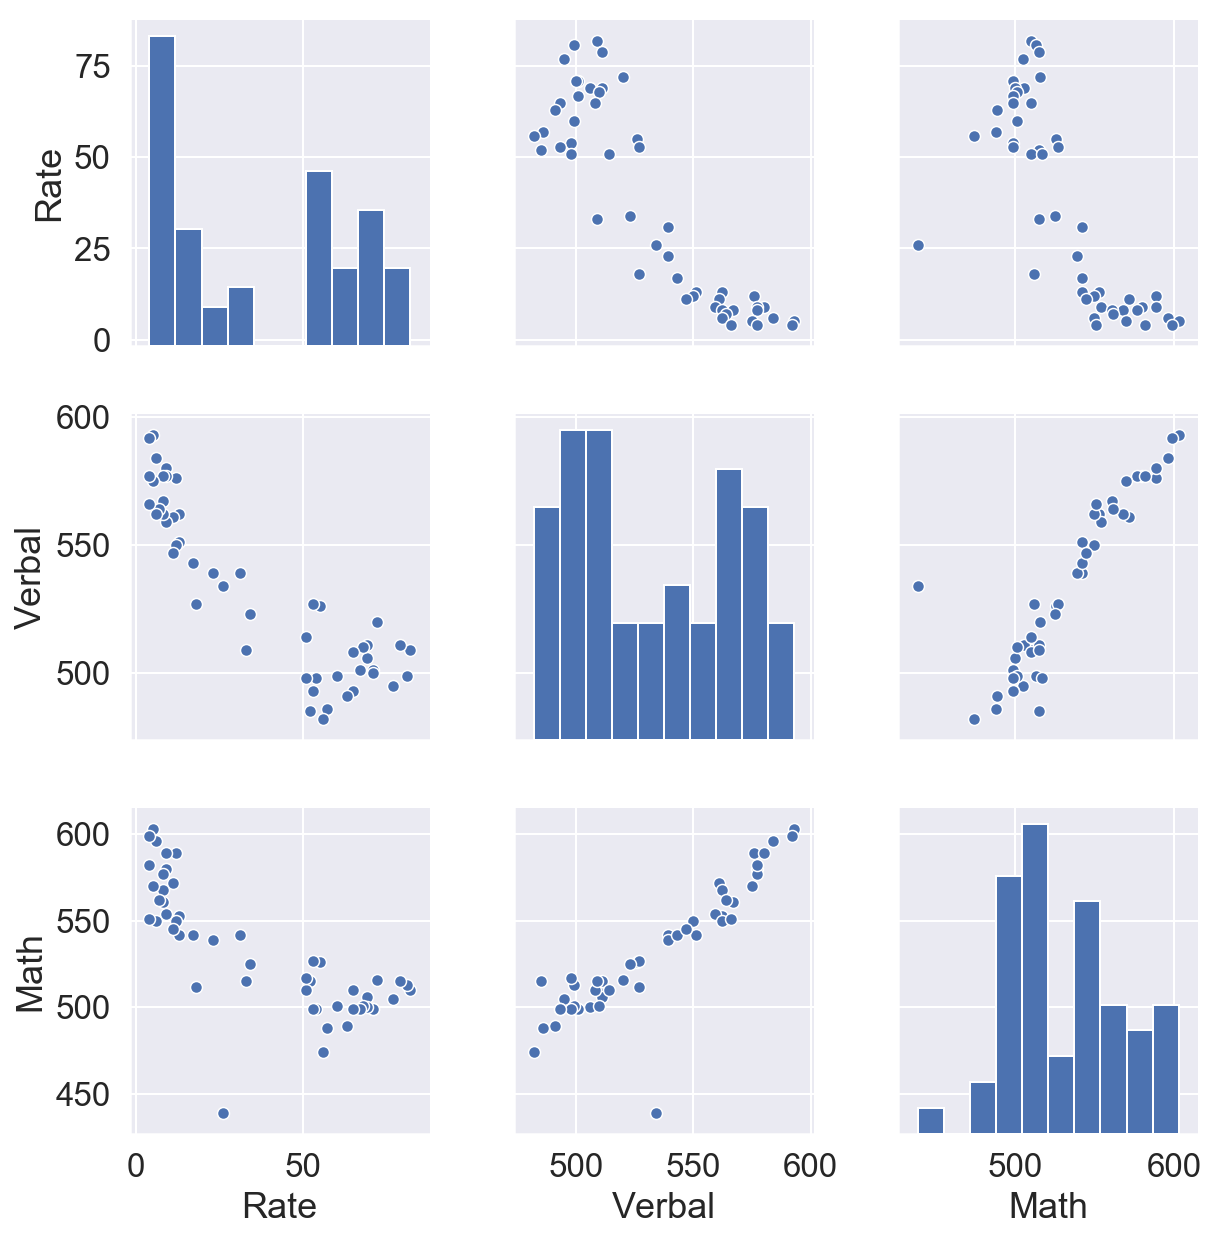

In [65]:
sns.pairplot(data,kind='scatter', height=3)
plt.show()
#Shows pairwise relationships for SAT dataset

#Strong correlation between Verbal and Math sores
#Interesting distribution of rates of participation
#Visible correlation between rate of participation and Math/Verbal scores 


## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

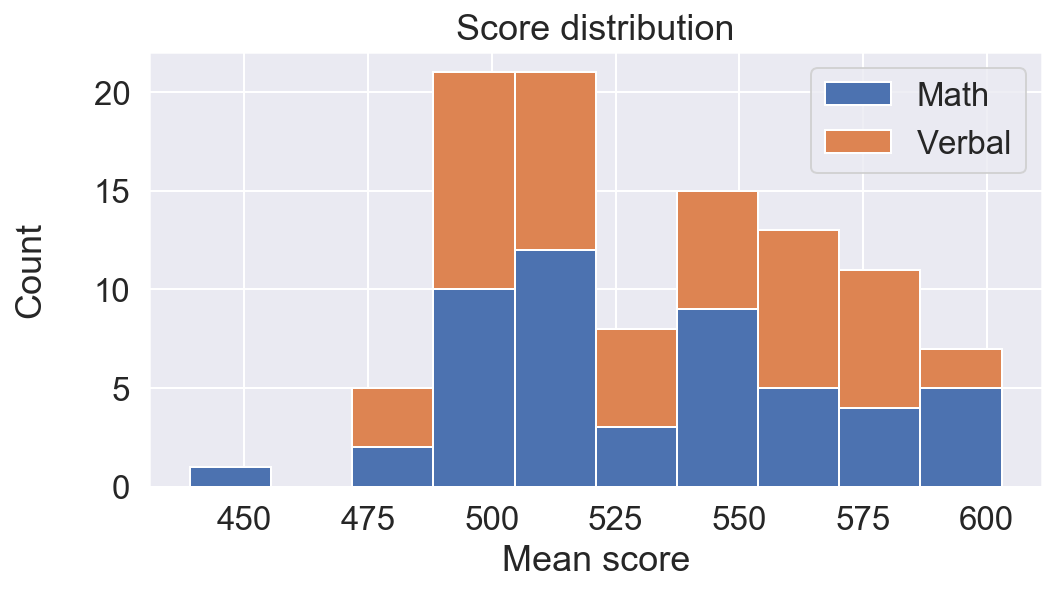

In [66]:
fig=data[['Math','Verbal']].plot.hist(stacked=True, figsize=(8,4), bins=10, title='Score distribution' )
fig.set_ylabel('Count\n', fontsize=18)
fig.set_xlabel('Mean score', fontsize=18)

plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

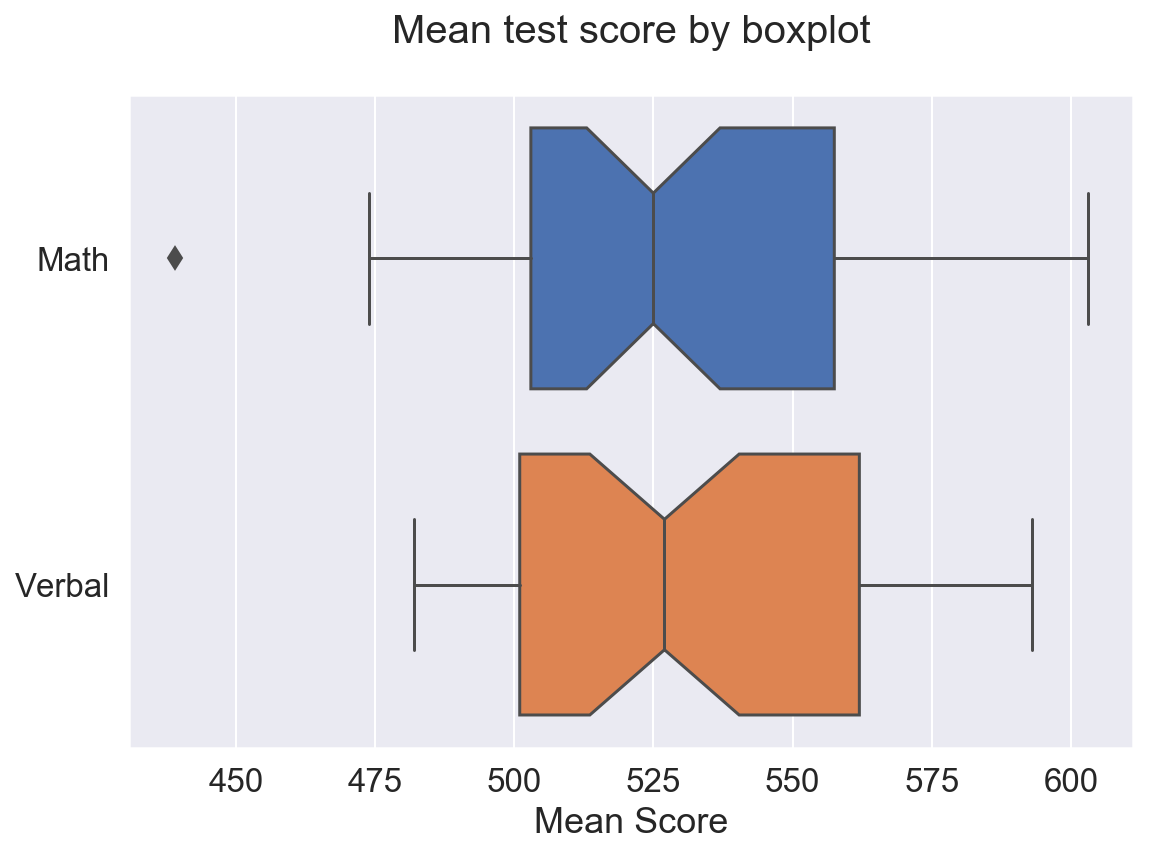

In [67]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()

sns.boxplot( data=data[['Math','Verbal']], orient='h', 
            fliersize=8, linewidth=1.5, notch=True,
            saturation=1, ax=ax, whis=1)

ax.set_title('Mean test score by boxplot\n', fontsize=20)
ax.set_xlabel('Mean Score', fontsize=18)



plt.show()

#Rate is measured on a different scale to Verbal and Math, comparing methods on different scales should be avoided
#because variables will not contribute equally to the analysis.


### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [68]:
import copy
#standardise all columns of type float or int
#Standardisation makes mean=0 and standard deviation=1, this makes for conveniant comparison across variables
#of different scale.

data_standardised= copy.copy(data)

for column in data_standardised.columns:
    if (data_standardised[column].dtypes==int) or (data_standardised[column].dtypes==float):
        data_standardised[column]=(data_standardised[column]-data_standardised[column].mean())/data_standardised[column].std()

    

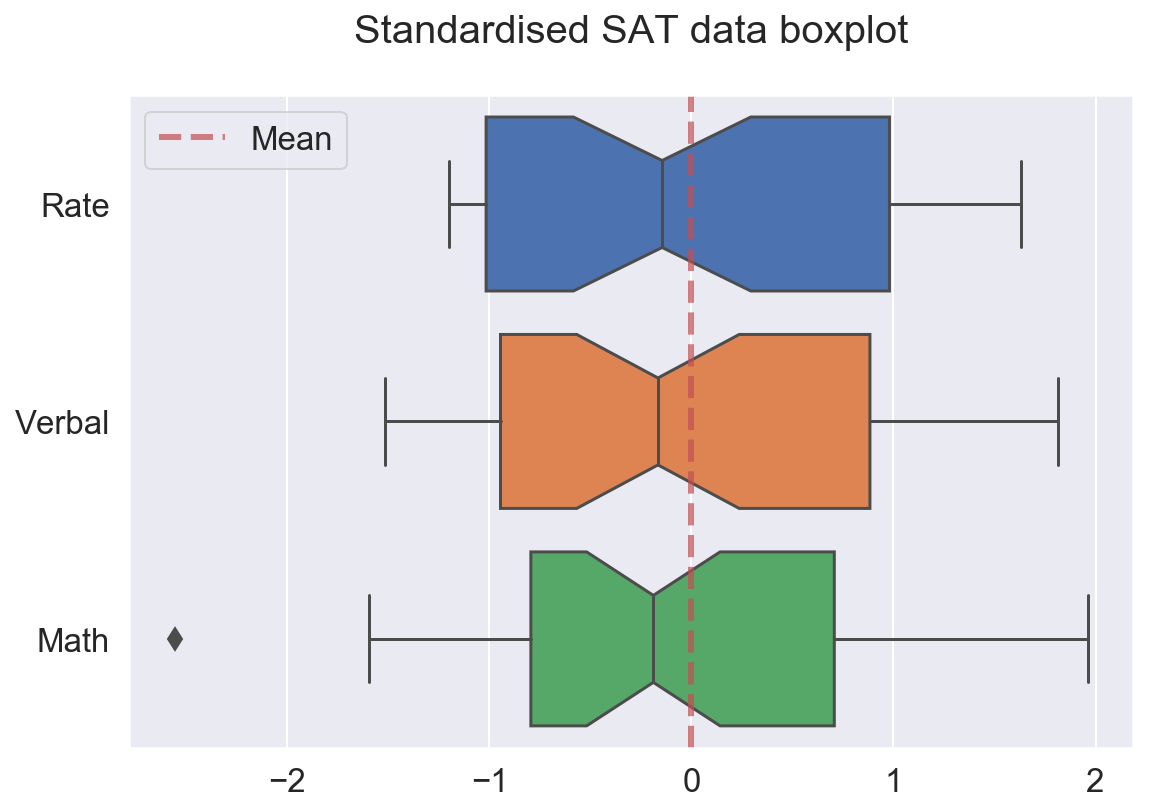

In [69]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()

sns.boxplot( data=data_standardised, orient='h', #
            fliersize=8, linewidth=1.5, notch=True,
            saturation=1, ax=ax, whis=1)

ax.set_title('Standardised SAT data boxplot\n', fontsize=20)
#ax.set_xlabel('Standard deviations from mean', fontsize=18)

ax.axvline(0, ls='dashed', lw=3, color='r',
           alpha=0.7, label='Mean')
ax.legend()
plt.show()


## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [72]:
data[data['Verbal']> data['Verbal'].mean()].shape
#24 States have a Verbal Score greater than the mean Verbal score across all states
#Shows that scores are approximately symmetrically distibuted around mean

(24, 4)

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [73]:
data[data['Verbal']>data['Verbal'].median()].shape
#This is identical to the Verbal>Verbal.mean dataframe. This is because the distribution of the data is approx
#symmetrical (we saw in our histogram of verbal scores that the distribution was approximatley uniform )

(24, 4)

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [74]:
data['Diff']=(data['Verbal']-data['Math'])

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [75]:
df_1=data.sort_values('Diff', ascending=False).iloc[:10,:]
df_2=data.sort_values('Diff', ascending=True).iloc[:10,:]
print(df_1.head(3))
print('\n')
print(df_2.head(3))

   State  Rate  Verbal  Math  Diff
27    OH    26     534   439    95
50    MS     4     566   551    15
29    WV    18     527   512    15


   State  Rate  Verbal  Math  Diff
21    HI    52     485   515   -30
23    CA    51     498   517   -19
1     NJ    81     499   513   -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!


### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [76]:
data.corr()
#Shows pearson correlation coefficient for each pair of variables in the SAT data set
#Shows strong positive correlation between Math and Verbal scores
#Shows strong negative correlation between Rate and Verbal/Math Score; implies higher participation rate
#is associated with a lower mean score

,Rate,Verbal,Math,Diff
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
Diff,-0.098671,0.044527,-0.395574,1.000000


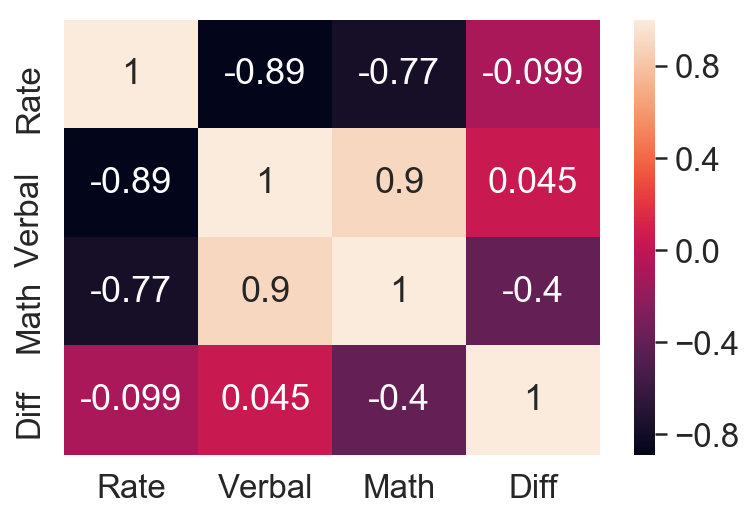

In [77]:
sns.heatmap(data.corr(), annot=True)
plt.show()


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [78]:
data.describe()

,Rate,Verbal,Math,Diff
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


Count: Number of data points in column <br>
Mean: The mean of all values in the column<br>
Std: Standard deviation of all values in column<br>
Min: The smallest value in the column<br>
25%: The first quartile of column (the middle number between the smallest value and the median of the data set)<br>
50%: The second quartile of column i.e. the median<br>
75% The third quartile of column (the middle number between the median and the largest value of the data set)<br>
Max: The largest value in the column


### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [79]:
data.cov()

,Rate,Verbal,Math,Diff
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Diff,-43.06,23.529412,-227.370196,250.899608


The covariance is a measure of "relatedness" between variables. It is the sum of deviations from the mean of one variable (X) times deviations from the mean of another (Y) adjusted by the sample size (N).

To convert covariance of two variables X,Y to correlation we must divide the covariance by the product of the standard deviations of X and Y i.e Correlation(X,Y)=Covariance(X,Y)/(StandardDeviation(X)* StandardDeviation(Y))

The correlation matrix is preffered to the covariance matrix because it is easier to understand. Covariance is relative to the variance of the variables, whereas correlation is on a scale of -1 to 1. 


## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [80]:
drug_data=pd.read_csv('drug-use-by-age.csv')
drug_data.head()
#Some entries are missing, represented by single dash:

#Missing values are all in frequency columns and correspond to a use rate of 0.0 (i.e if nobody is using drugs,
#there is no frequency of use to report). Some use values of 0.0 do have a corresponding frequency, likely
#because the use value of 0.0 has been reached by rounding a value smaller than 0.05 to one decimal place.

#We will leave missing values as NAN because we don't want 0 use values to have an affect on calculations
#or visualisations

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [81]:
drug_data.dtypes
#some rows we expect to be numeric are of type float, we will convert all strings into numeric data if possible,
#convert to Nan otherwise
#age is type object because ages are expressed as bins of varying length, will leave this row as is

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [82]:
drug_age=drug_data['age'] #Save age column (don't want to convert strings to NAN)
drug_data=drug_data.apply(pd.to_numeric, errors='coerce') #convert all entries to number is possible, Nan if not
drug_data['age']=drug_age  #Replace age column 

In [83]:
print(drug_data.isnull().sum().sum(),'missing values in dataframe')

9 missing values in dataframe


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [84]:
use_columns=['age']
for header in drug_data.columns[2:]:
    if 'use' in header:
        use_columns.append(header)
        
dd_use=drug_data[use_columns]

In [85]:
freq_columns=['age']
for header in drug_data.columns[2:]:
    if 'frequency' in header:
        freq_columns.append(header)
        
dd_freq=drug_data[freq_columns]

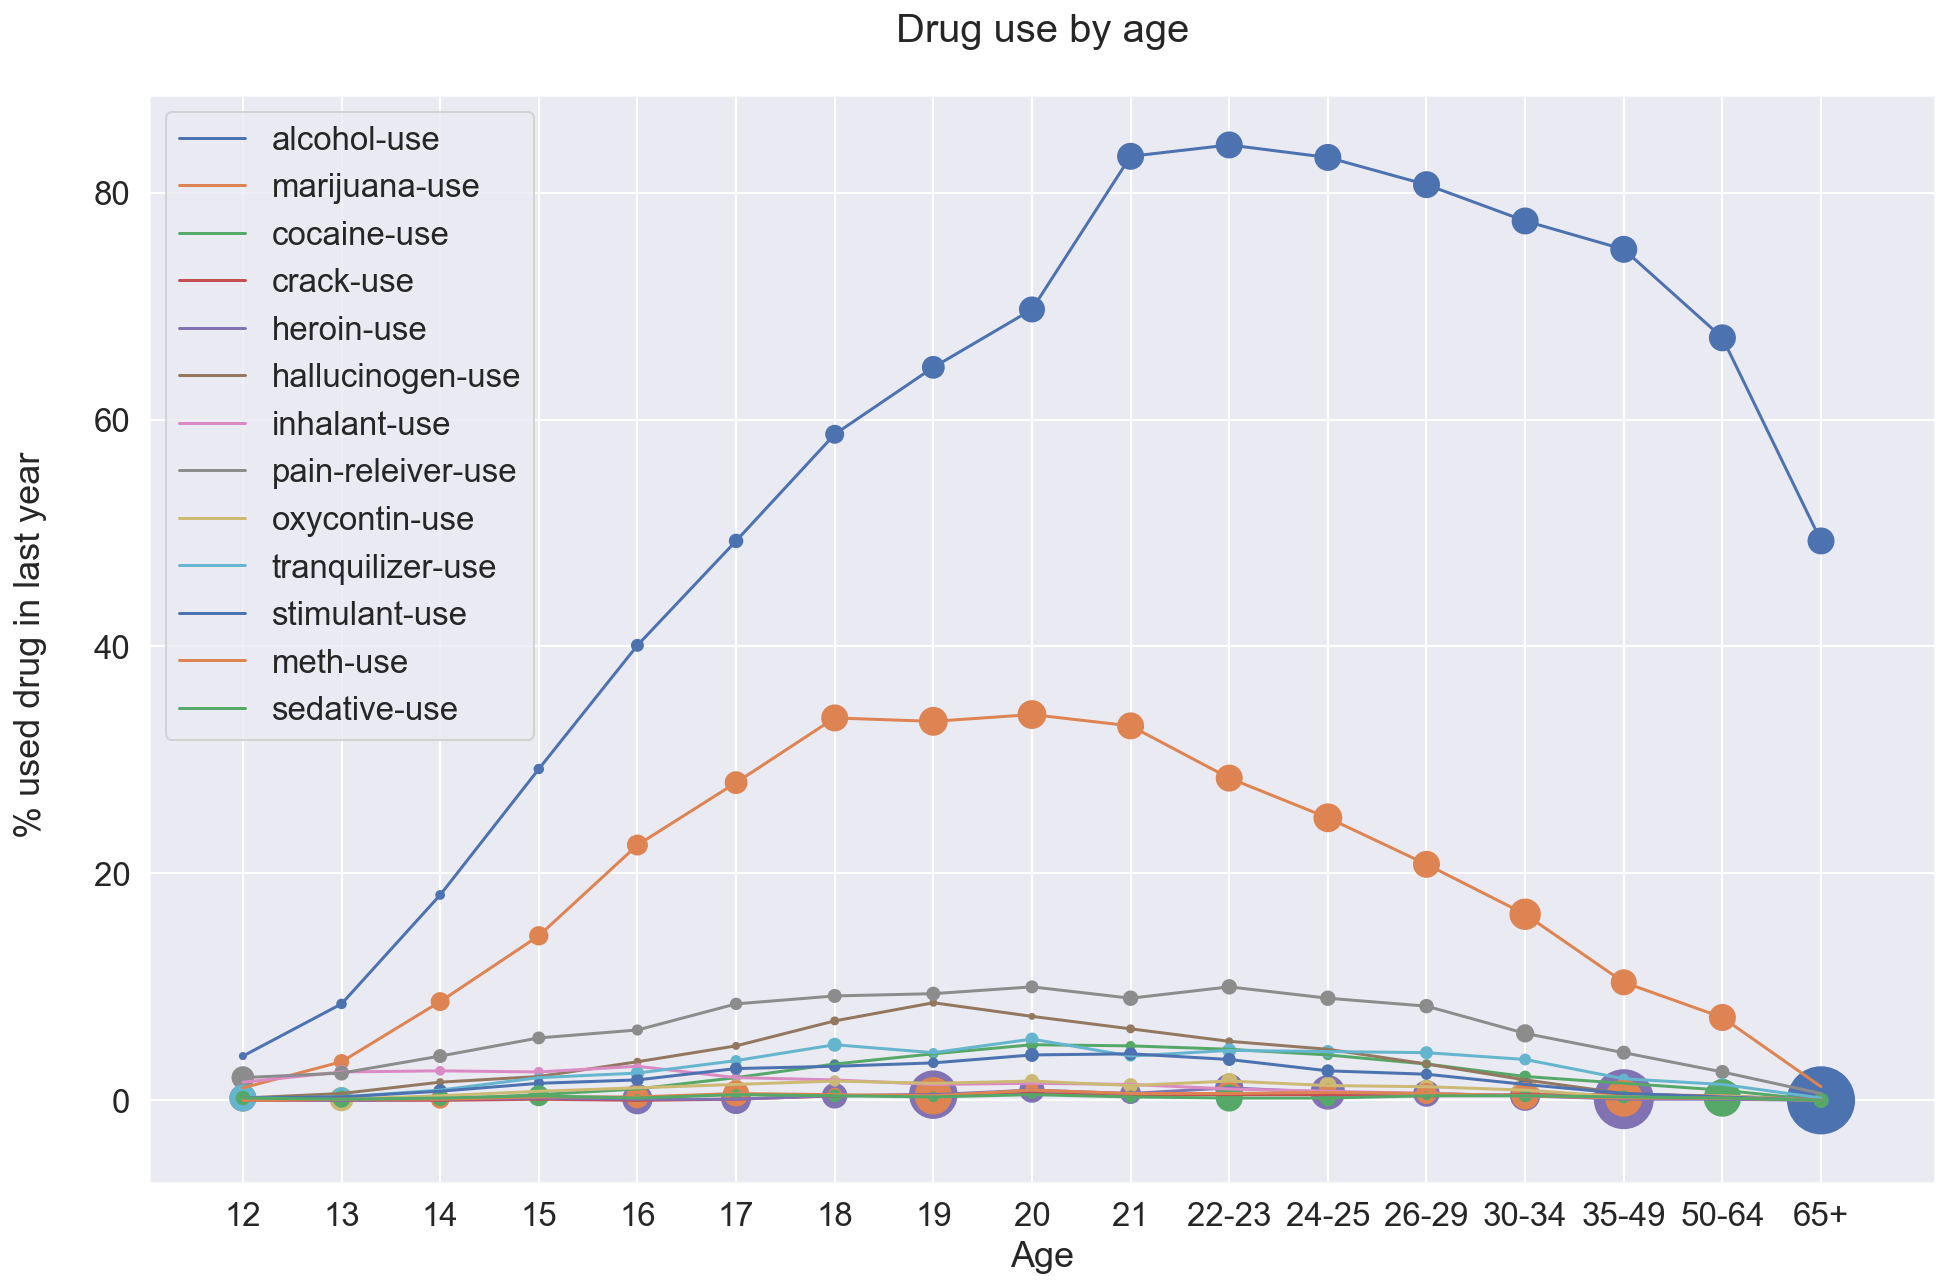

In [86]:
#Scatter graph of drug use against age, with points weighted by frequency of drug use
ind=drug_data['age']
d1=drug_data['alcohol-use']
d2=drug_data['marijuana-use']
d3=drug_data['cocaine-use']
d4=drug_data['crack-use']
d5=drug_data['heroin-use']
d6=drug_data['hallucinogen-use']
d7=drug_data['inhalant-use']
d8=drug_data['pain-releiver-use']
d9=drug_data['oxycontin-use']
d10=drug_data['tranquilizer-use']
d11=drug_data['stimulant-use']
d12=drug_data['meth-use']
d13=drug_data['sedative-use']

p1=drug_data['alcohol-frequency']*3
p2=drug_data['marijuana-frequency']*3
p3=drug_data['cocaine-frequency']*3
p4=drug_data['crack-frequency']*3
p5=drug_data['heroin-frequency']*3
p6=drug_data['hallucinogen-frequency']*3
p7=drug_data['inhalant-frequency']*3
p8=drug_data['pain-releiver-frequency']*3
p9=drug_data['oxycontin-frequency']*3
p10=drug_data['tranquilizer-frequency']*3
p11=drug_data['stimulant-frequency']*3
p12=drug_data['meth-frequency']*3
p13=drug_data['sedative-frequency']*3

fig=plt.figure(figsize=(16,10))
ax=fig.gca()
ax.set_title('Drug use by age\n', fontsize=20)
ax.set_xlabel('Age', fontsize=18)
ax.set_ylabel('% used drug in last year \n', fontsize=18)

plt.scatter(ind, d1, s=p1)
plt.plot(ind,d1)
plt.scatter(ind, d2, s=p2)
plt.plot(ind,d2)
plt.scatter(ind, d3, s=p3)
plt.plot(ind,d3)
plt.scatter(ind, d4, s=p4)
plt.plot(ind,d4)
plt.scatter(ind, d5, s=p5)
plt.plot(ind,d5)
plt.scatter(ind, d6, s=p6)
plt.plot(ind,d6)
plt.scatter(ind, d7, s=p7)
plt.plot(ind,d7)
plt.scatter(ind, d8, s=p8)
plt.plot(ind,d8)
plt.scatter(ind, d9, s=p9)
plt.plot(ind,d9)
plt.scatter(ind, d10, s=p10)
plt.plot(ind,d10)
plt.scatter(ind, d11, s=p11)
plt.plot(ind,d11)
plt.scatter(ind, d12, s=p12)
plt.plot(ind,d12)
plt.scatter(ind, d13, s=p13)
plt.plot(ind,d13)



plt.legend(dd_use.columns[1:])
plt.show()

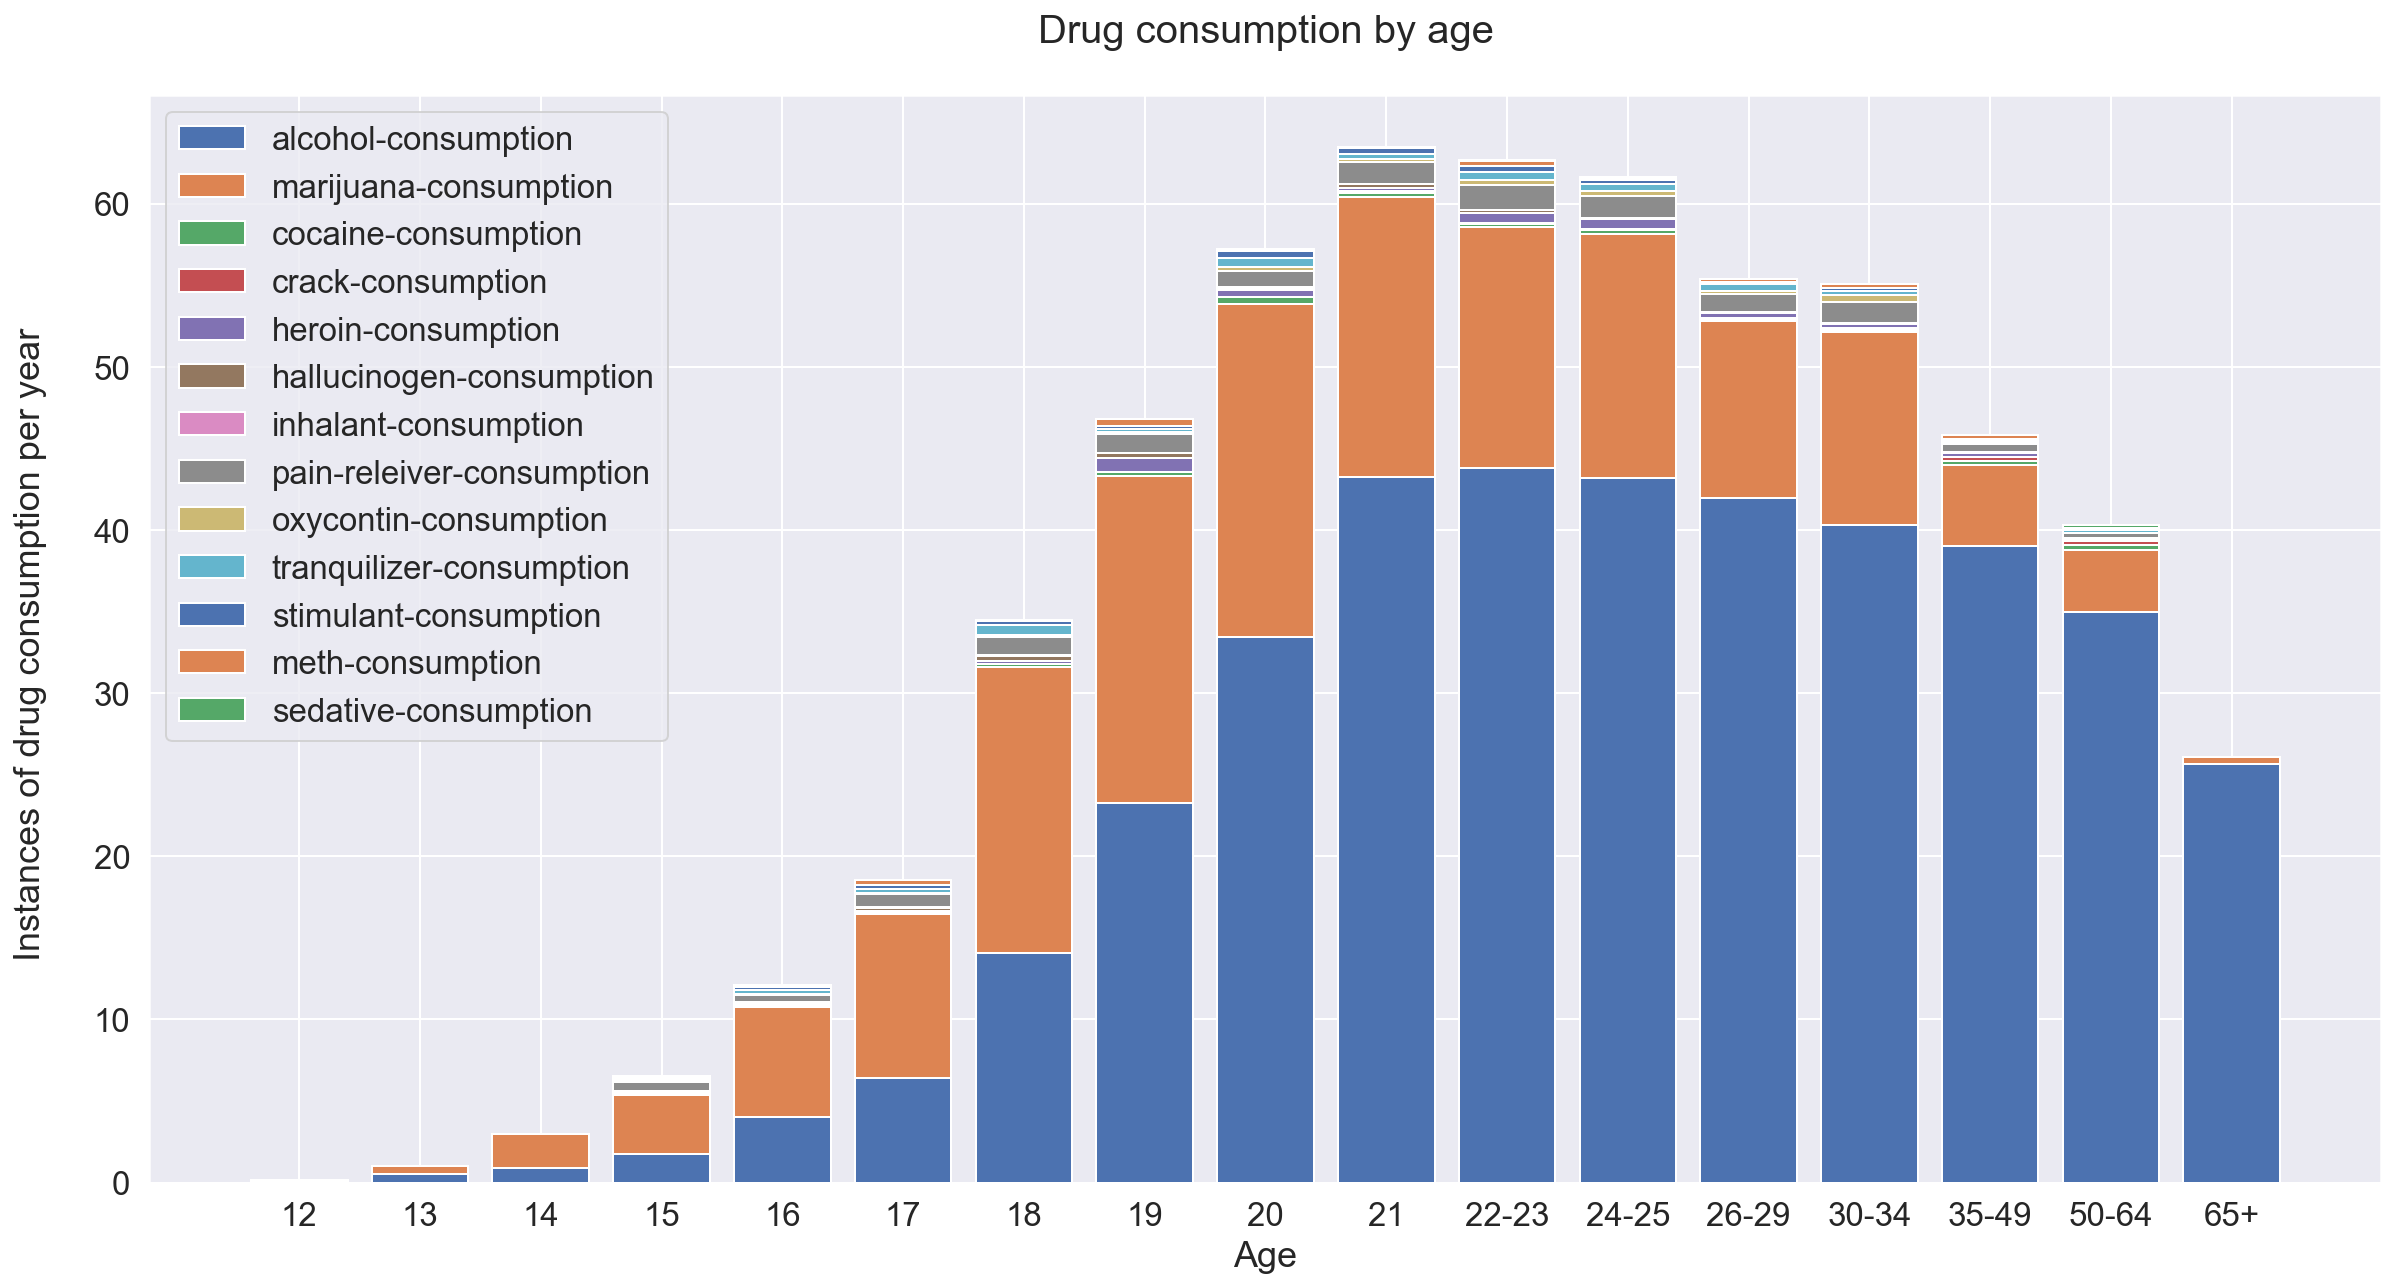

In [88]:
#bar plot representing total drug consumption per year by age, coloured by drug consumed

legend=[]
for i in dd_use.columns[1:]:
        legend.append(i.replace('-use','-consumption'))

ind=drug_data['age']
d1=drug_data['alcohol-use']*drug_data['alcohol-frequency']/100
d2=drug_data['marijuana-use']*drug_data['marijuana-frequency']/100
d3=drug_data['cocaine-use']*drug_data['cocaine-frequency']/100
d4=drug_data['crack-use']*drug_data['crack-frequency']/100
d5=drug_data['heroin-use']*drug_data['heroin-frequency']/100
d6=drug_data['hallucinogen-use']*drug_data['hallucinogen-frequency']/100
d7=drug_data['inhalant-use']*drug_data['inhalant-frequency']/100
d8=drug_data['pain-releiver-use']*drug_data['pain-releiver-frequency']/100
d9=drug_data['oxycontin-use']*drug_data['oxycontin-frequency']/100
d10=drug_data['tranquilizer-use']*drug_data['tranquilizer-frequency']/100
d11=drug_data['stimulant-use']*drug_data['stimulant-frequency']/100
d12=drug_data['meth-use']*drug_data['meth-frequency']/100
d13=drug_data['sedative-use']*drug_data['sedative-frequency']/100

fig=plt.figure(figsize=(20,10))
ax=fig.gca()
ax.set_title('Drug consumption by age\n', fontsize=20)
ax.set_xlabel('Age', fontsize=18)
ax.set_ylabel('Instances of drug consumption per year \n', fontsize=18)

width=.8
p1= plt.bar(ind, d1, width)
p2 = plt.bar(ind, d2, width, bottom=d1)
p3 = plt.bar(ind, d3, width, bottom=d1+d2)
p4 = plt.bar(ind, d4, width, bottom=d1+d2+d3)
p5 = plt.bar(ind, d5, width, bottom=d1+d2+d3+d4)
p6 = plt.bar(ind, d6, width, bottom=d1+d2+d3+d4+d5)
p7 = plt.bar(ind, d7, width, bottom=d1+d2+d3+d4+d5+d6)
p8 = plt.bar(ind, d8, width, bottom=d1+d2+d3+d4+d5+d6+d7)
p9 = plt.bar(ind, d9, width, bottom=d1+d2+d3+d4+d5+d6+d7+d8)
p10 = plt.bar(ind, d10, width, bottom=d1+d2+d3+d4+d5+d6+d7+d8+d9)
p11 = plt.bar(ind, d11, width, bottom=d1+d2+d3+d4+d5+d6+d7+d8+d9+d10)
p12 = plt.bar(ind, d12, width, bottom=d1+d2+d3+d4+d5+d6+d7+d8+d9+d10+d11)
p13 = plt.bar(ind, d13, width, bottom= d1+d2+d3+d4+d5+d6+d7+d8+d9+d10+d11+d12)

plt.legend(legend)
plt.show()

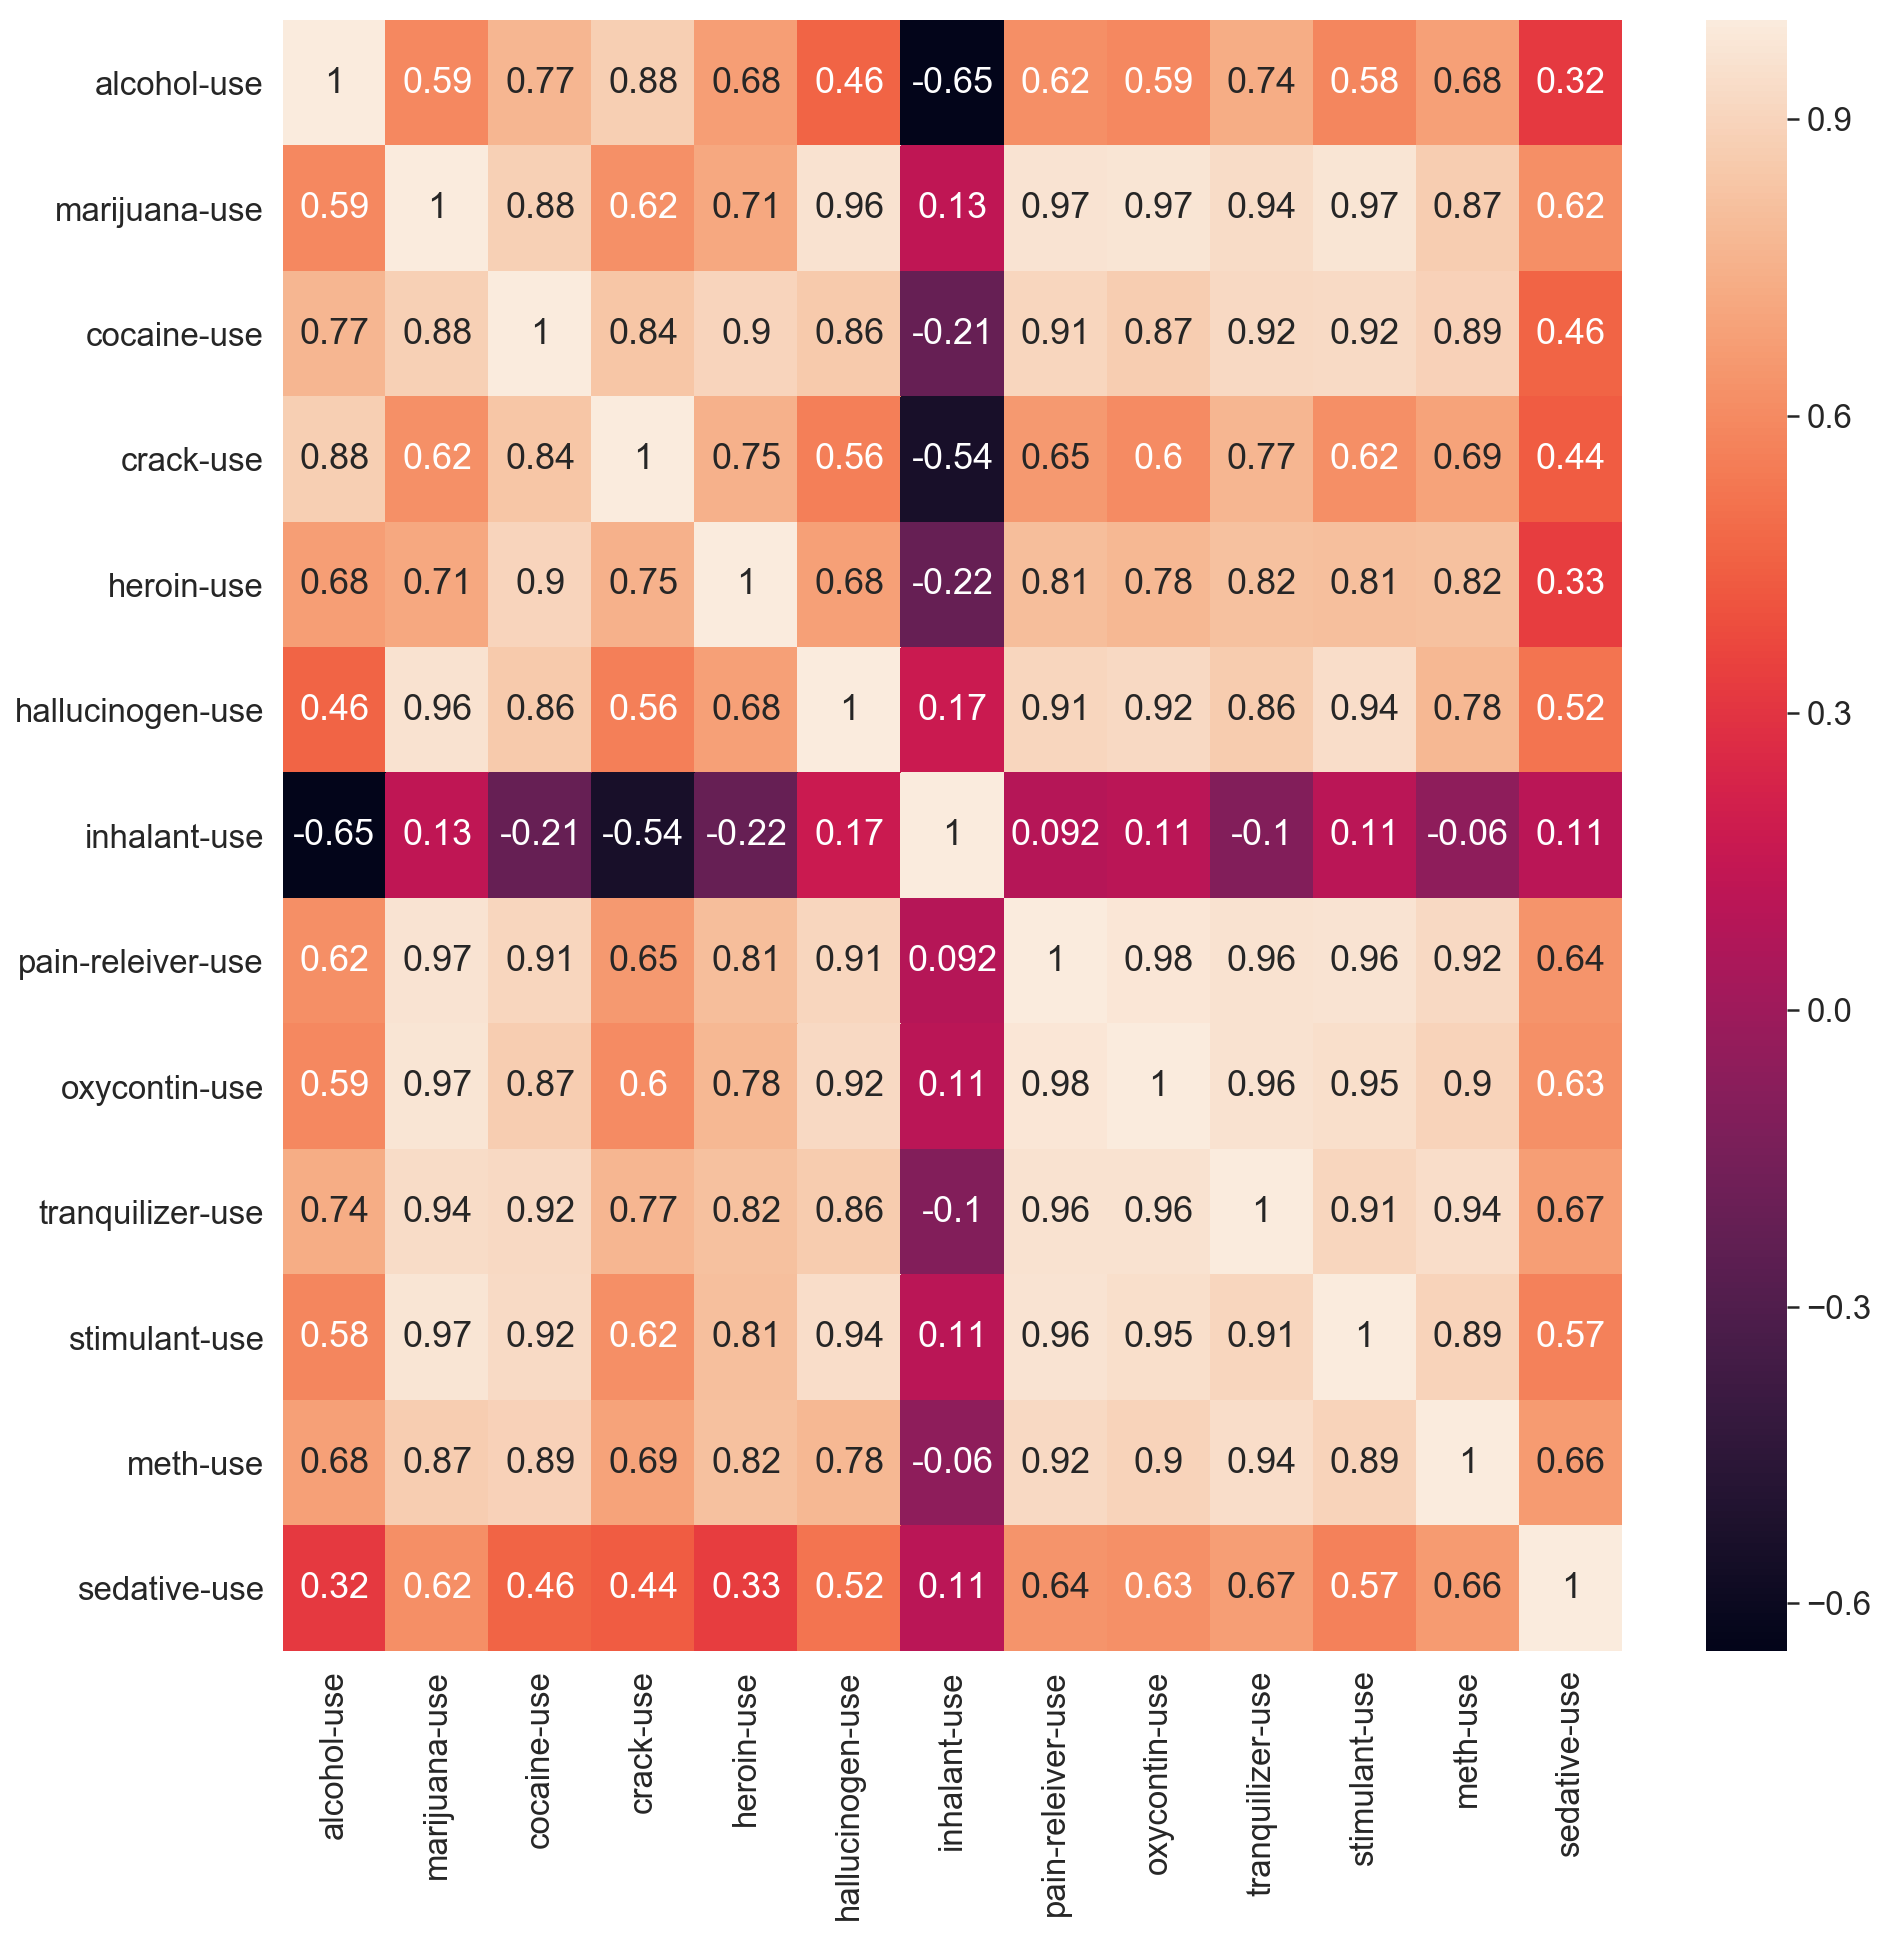

In [89]:
#correlation matrix of drug uses plotted as heat map
fig = plt.figure(figsize=(15, 15))
sns.heatmap(dd_use.corr(), annot=True)
plt.show()

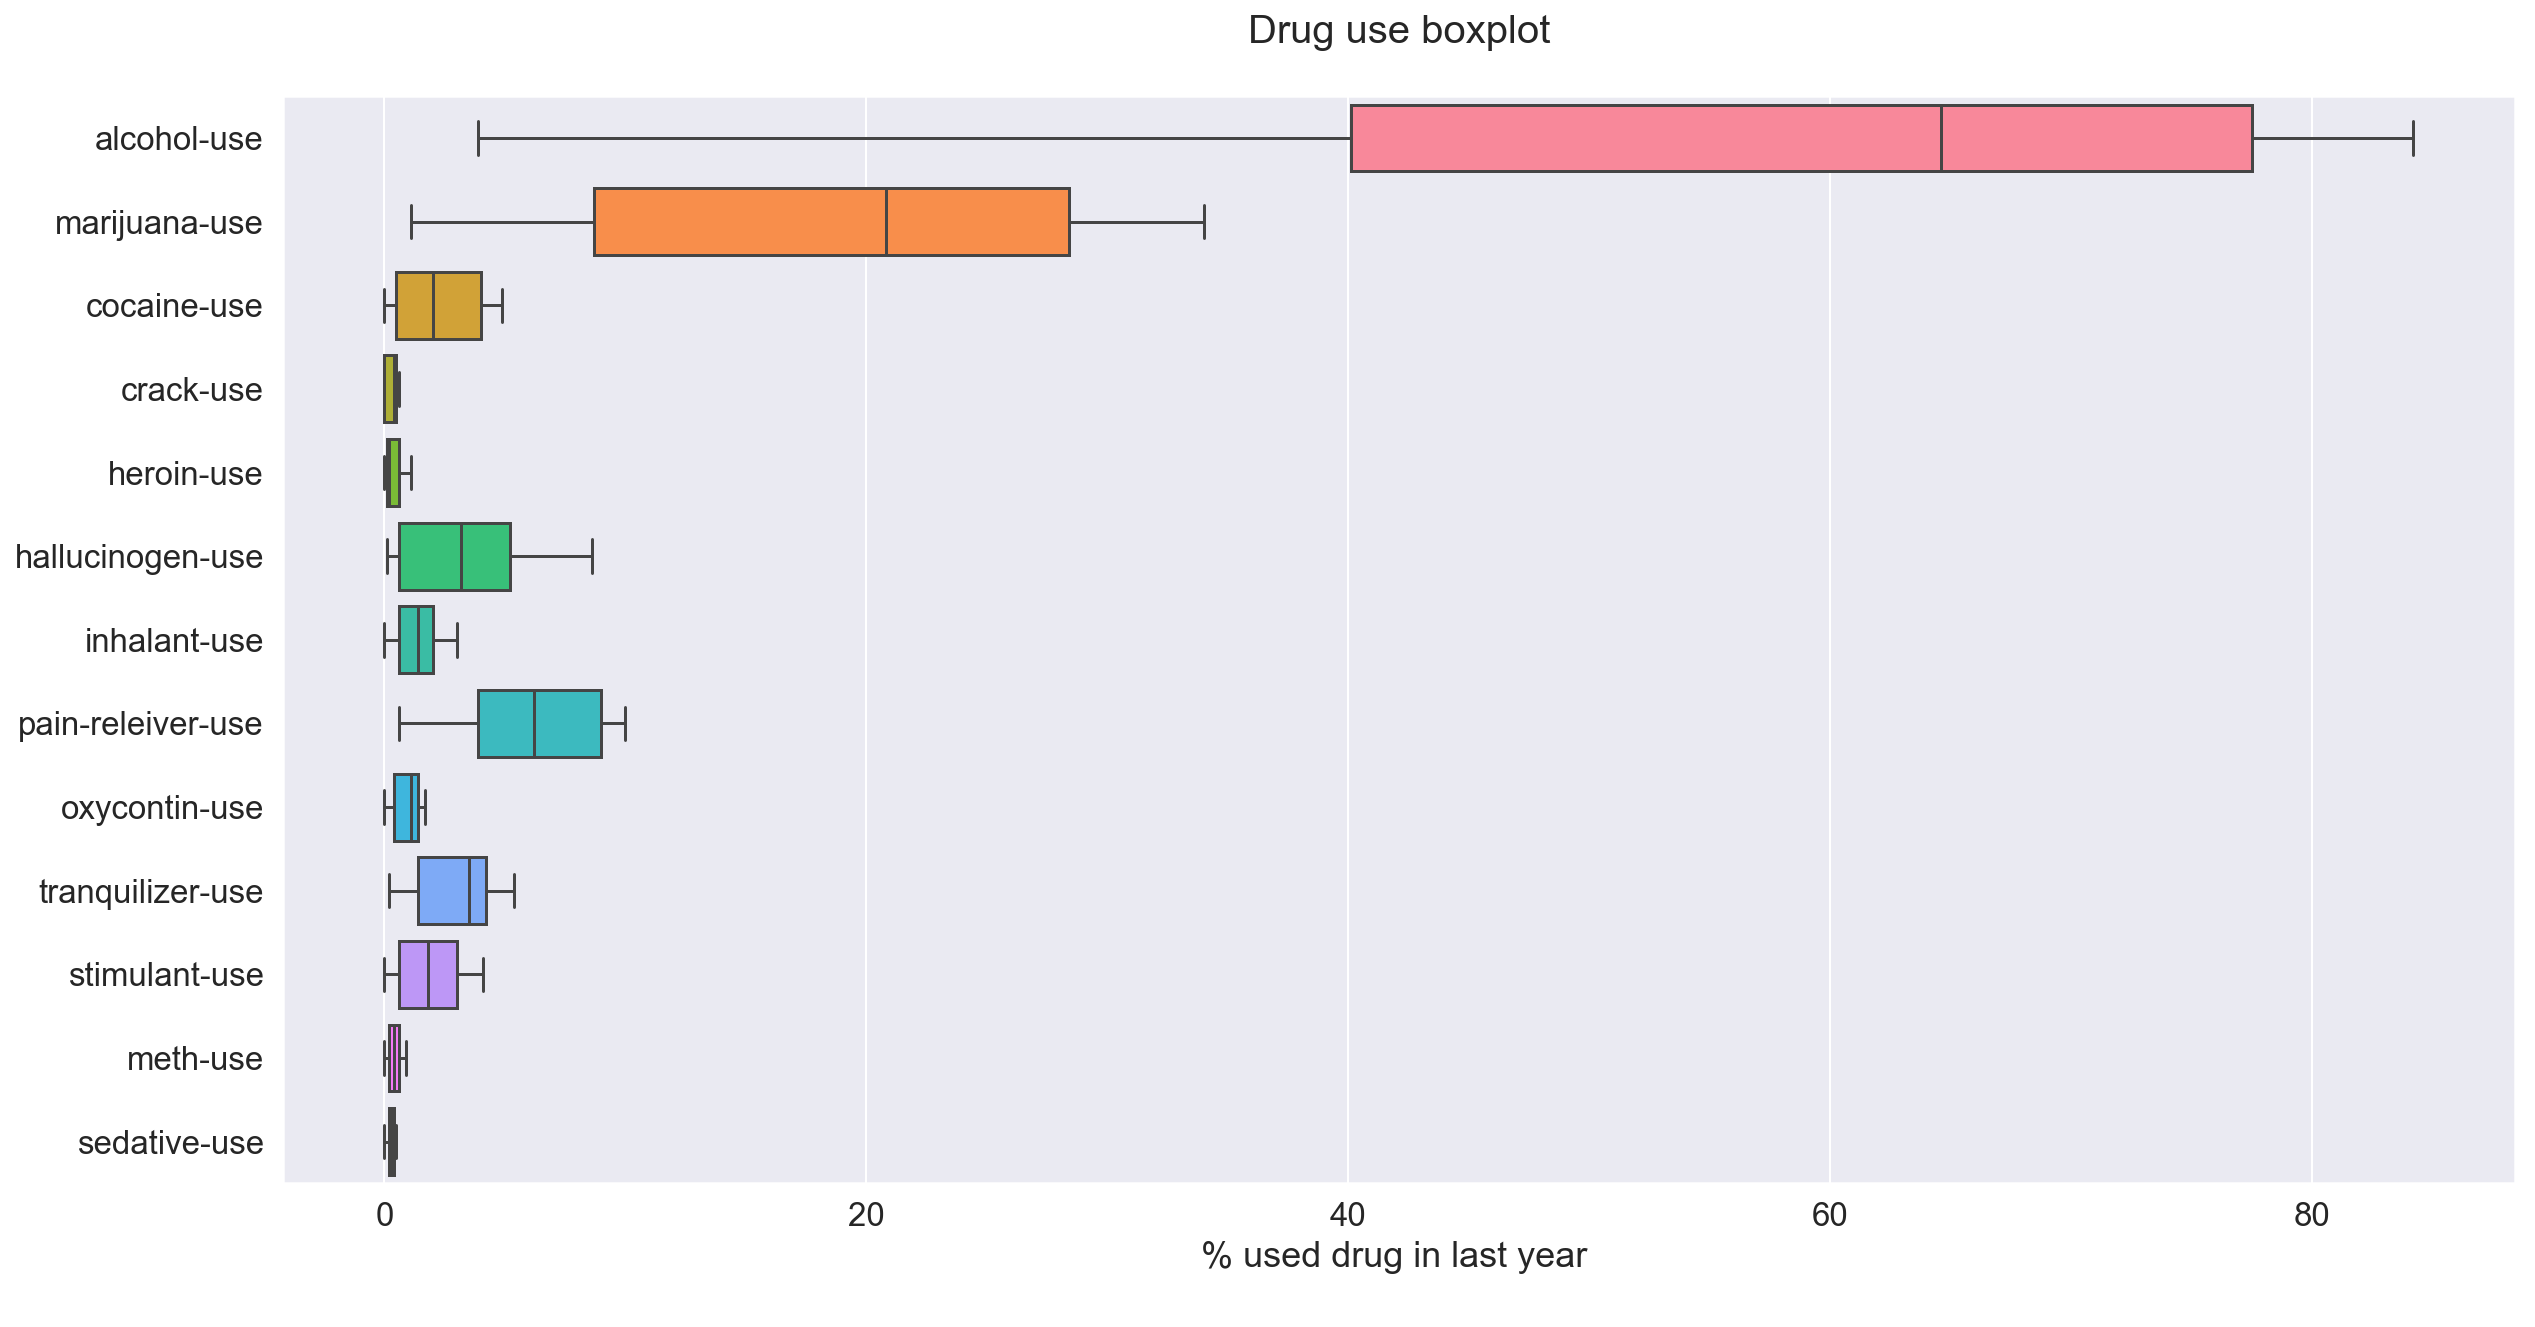

In [90]:
#drug use boxplot
fig = plt.figure(figsize=(20, 10))
ax = fig.gca()
ax.set_xlabel('% used drug in last year \n', fontsize=18)


sns.boxplot( data=dd_use, orient='h', 
            fliersize=8, linewidth=1.5, notch=False,
            saturation=1, ax=ax, whis=1.5)

ax.set_title('Drug use boxplot\n', fontsize=20)
plt.show()

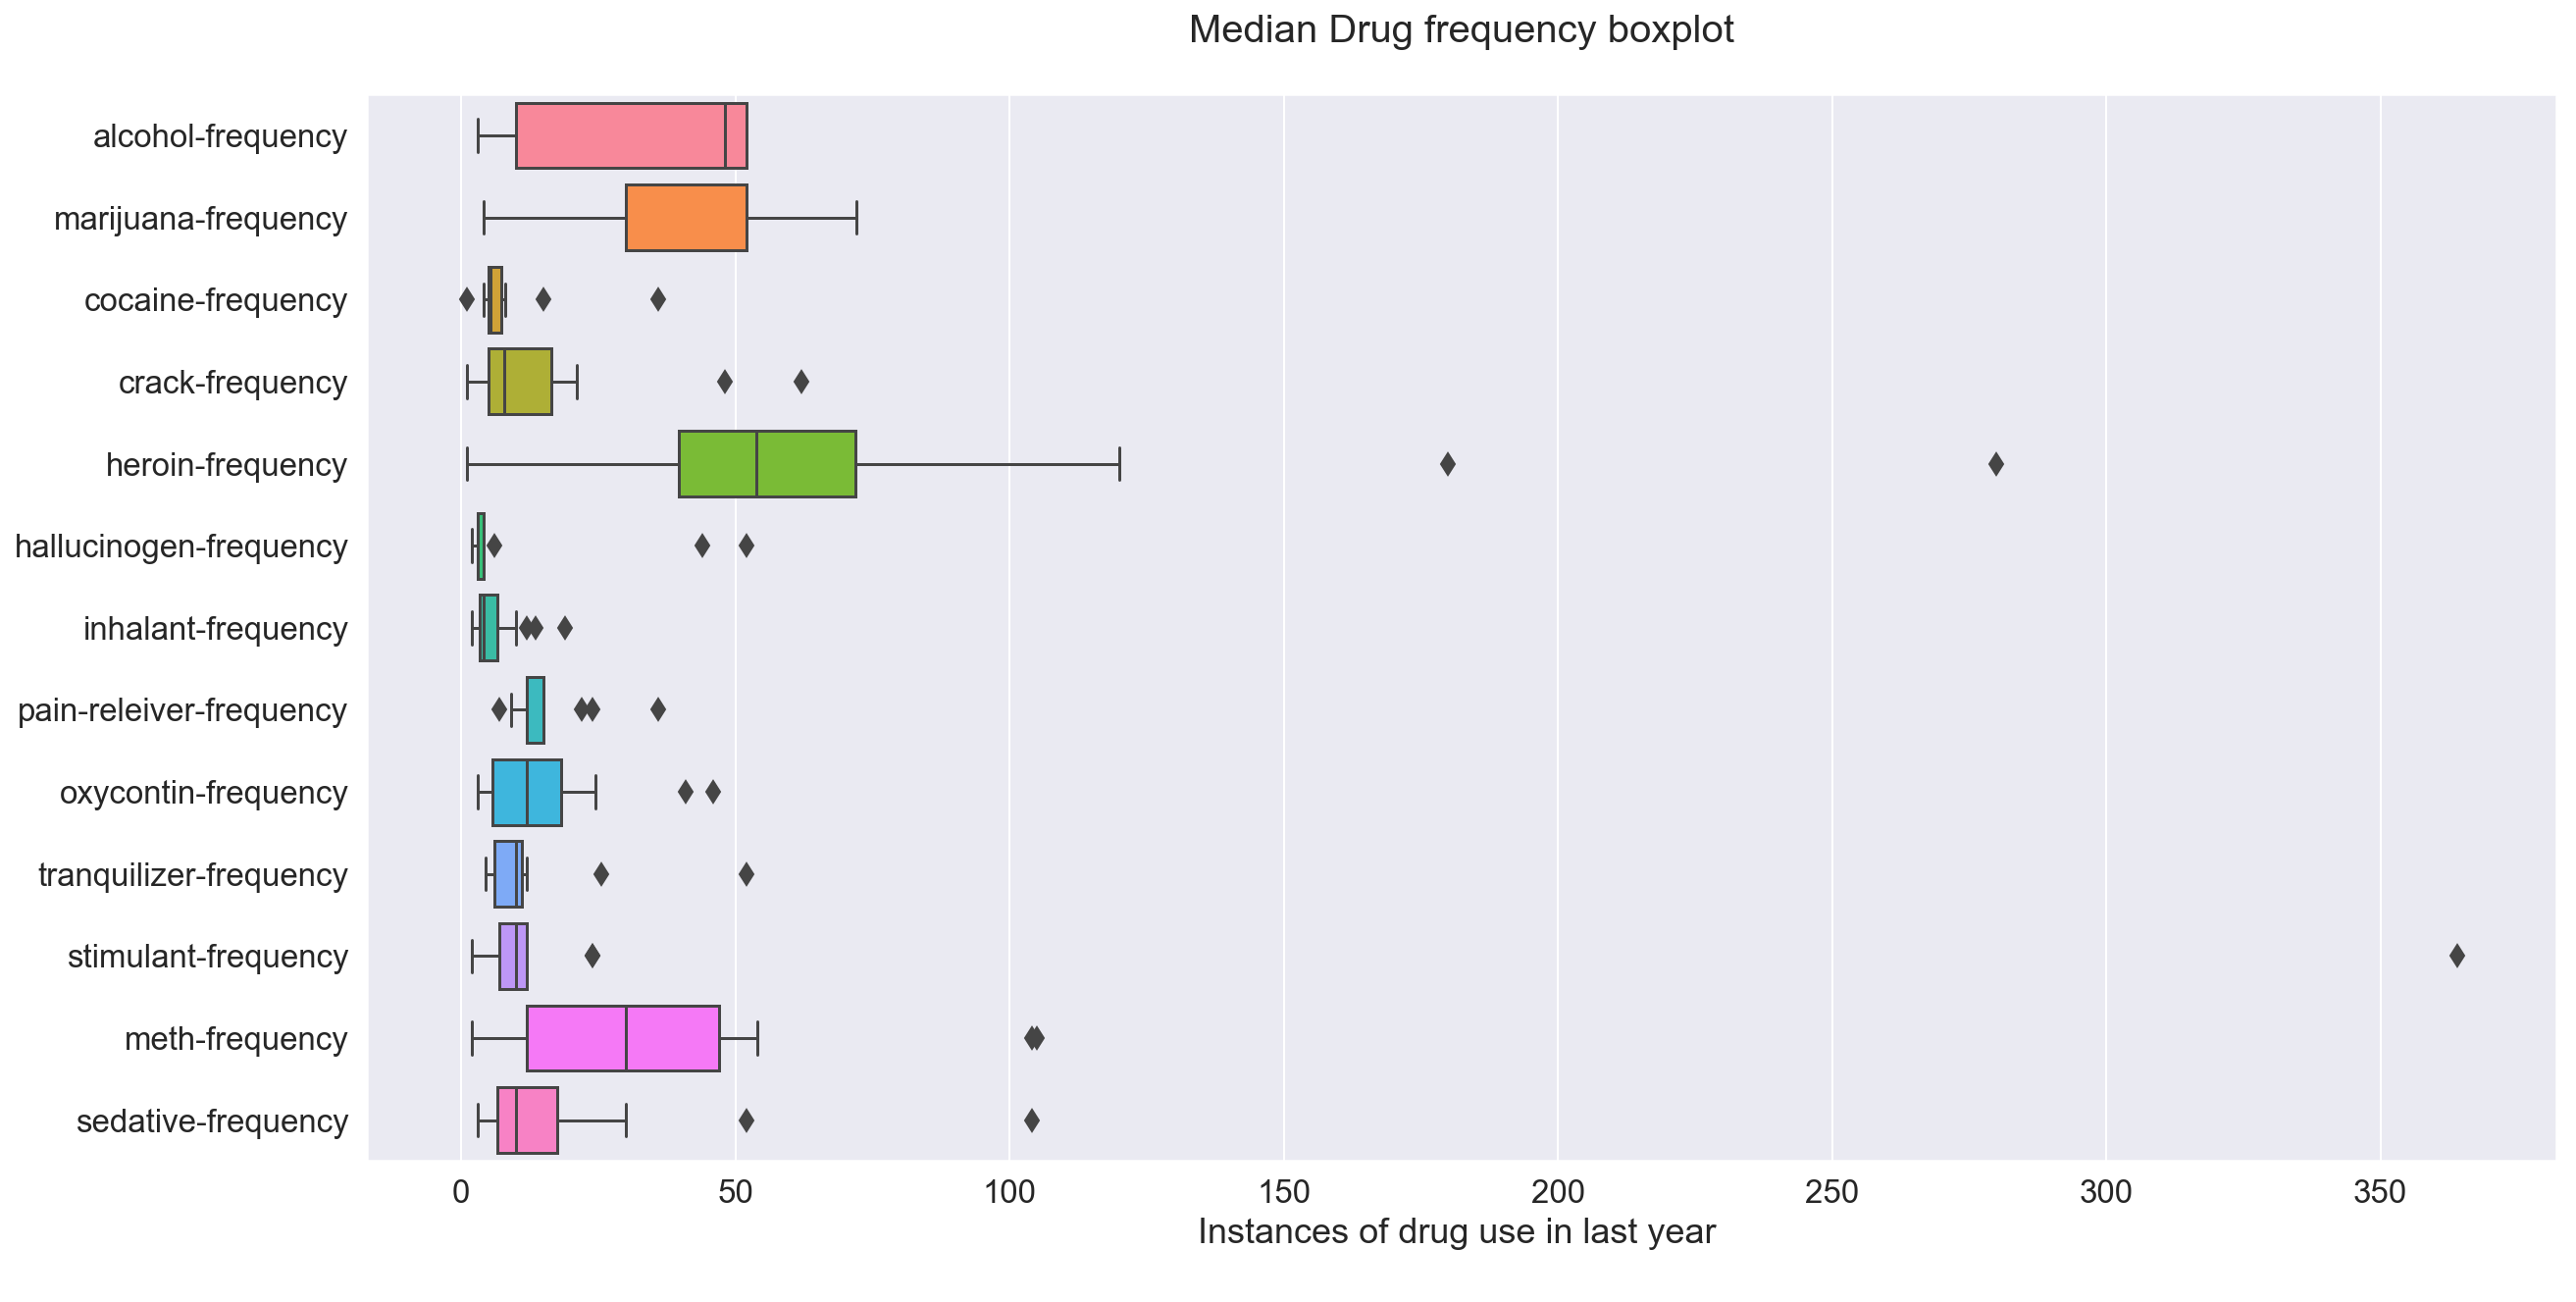

In [91]:
#drug freq boxplot
fig = plt.figure(figsize=(20, 10))
ax = fig.gca()
ax.set_xlabel('Instances of drug use in last year \n', fontsize=18)

sns.boxplot( data=dd_freq.iloc[:,:], orient='h', #
            fliersize=8, linewidth=1.5, notch=False,
            saturation=1, ax=ax, whis=1.5)

ax.set_title('Median Drug frequency boxplot\n', fontsize=20)
plt.show()

In [92]:
#look at descriptive statistics for drug use and frequency, restrict analysis to age 21 and under because we need
#all bin widths to be the same to have meaningful results
dd_use.iloc[:10,:].describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol-use,10.0,42.53,27.115762,3.9,20.875,44.70,63.125,83.2
marijuana-use,10.0,21.23,13.241689,1.1,10.150,25.25,33.300,34.0
cocaine-use,10.0,2.08,2.003220,0.1,0.200,1.50,3.875,4.9
crack-use,10.0,0.22,0.248551,0.0,0.000,0.10,0.475,0.6
heroin-use,10.0,0.30,0.290593,0.0,0.100,0.15,0.475,0.9
hallucinogen-use,10.0,4.20,3.036445,0.2,1.725,4.10,6.825,8.6
inhalant-use,10.0,2.03,0.579367,1.4,1.525,1.90,2.500,3.0
pain-releiver-use,10.0,6.61,3.036610,2.0,4.300,7.35,9.150,10.0
oxycontin-use,10.0,1.01,0.624411,0.1,0.500,1.20,1.475,1.7
tranquilizer-use,10.0,2.77,1.892705,0.2,1.175,2.95,4.125,5.4


In [93]:
dd_freq.iloc[:10,:].describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol-frequency,10.0,20.300000,18.661011,3.0,6.000,11.50,33.000,52.0
marijuana-frequency,10.0,35.800000,19.520929,4.0,24.250,33.00,52.000,60.0
cocaine-frequency,10.0,5.100000,1.837873,1.0,5.000,5.00,5.500,8.0
crack-frequency,8.0,8.562500,7.296954,1.0,2.750,7.25,11.750,21.0
heroin-frequency,9.0,52.222222,53.244783,1.0,30.000,45.00,64.000,180.0
hallucinogen-frequency,10.0,8.400000,15.356504,2.0,3.000,3.50,4.000,52.0
inhalant-frequency,10.0,6.150000,5.291765,2.0,3.250,4.00,5.375,19.0
pain-releiver-frequency,10.0,13.700000,8.179242,7.0,10.000,12.00,13.500,36.0
oxycontin-frequency,10.0,12.300000,11.930819,3.0,4.875,7.25,13.125,41.0
tranquilizer-frequency,10.0,13.850000,14.774321,4.5,5.500,8.50,11.750,52.0


In [94]:
dd_use.corr().describe().transpose().sort_values(by=['mean'], ascending=False).iloc[:,:2]
#shows the mean of correlations between drug and all other drugs

,count,mean
pain-releiver-use,13.0,0.800179
tranquilizer-use,13.0,0.798218
oxycontin-use,13.0,0.787147
stimulant-use,13.0,0.786937
marijuana-use,13.0,0.786569
cocaine-use,13.0,0.769376
meth-use,13.0,0.767799
hallucinogen-use,13.0,0.739957
heroin-use,13.0,0.681980
crack-use,13.0,0.605882


EDA CONCLUSIONS

Scatter graph: <br>
Many of the drug use rates increase with age during adolescence and then begin to fall off round the mid twenties. Alcohol and marijuana are consistently the most popular drugs.

Consumption: <br>
By multiplying median frequency by use for each drug and age we can get an idea of the total consumption of drugs by age groups and the distribution of drugs consumed. As expected alcohol and marijuana make up the bulk of drug consumption. Other drugs make up a relatively small portion of drug consumption despite being associated with a high frequency of use, this is because of the low overall use rate of those drugs.

Correlation matrix heatmap:<br>
There are many high correlations in the heat map. Instances of high correlation between drug use rates indicates that there is strong positive correlation between drug use rate for each age group. Inhalant use stands out as a drug that doesn't follow the trends across age associated with most other drugs.

Boxplots:<br>
Drug use rates: Gives a good view of relative drug use rates. We can see more clearly the more popular drugs after alcohol and marijuana (namely cocaine, hallucigens and pain relievers). This could be helpful for selecting which drugs to do further analysis on (depending on the motivations for our analysis). We can also see there are almost no outliers in this data (outlier defined as greater than (3rd quartile +1.5IQR) or less than (1st quartile-1.5IQR)).

Drug frequency: Gives a good view of use rate given a person of a specific age group is a drug user. Could be useful to establish extent to which taking specific drug is habit forming/addictive. There are a lot of outliers (by above definition) in this data, so we would need to establish a framework for deciding what we want to treat as outliers before working with drug frequency data further.

Descriptive statistic tables:<br>
Restricting analysis to age groups that have identical bin widths (i.e 1) we are able to establish some descriptive statistic for drug use and frequency. We cannot draw much in the way of strong conlusions with this data (beyond what we have already concluded from our existing EDA), but it could be useful for formulating policy decisions aimed at younger ages (or school age).

Table of average correlations:<br>
Takes the mean of correlations for each row in heat map and sorts them. Could be useful in deciding which drugs to focus on more i.e. which ones are generally good predictors of use rate of other drugs for age groups.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

Establish if there is a relationship between marijuana use and stimulant use.

We will establish the extent to which a higher/lower use of one drug for a specific age group is associated with a higher/lower use of the other drug for said specific age group.

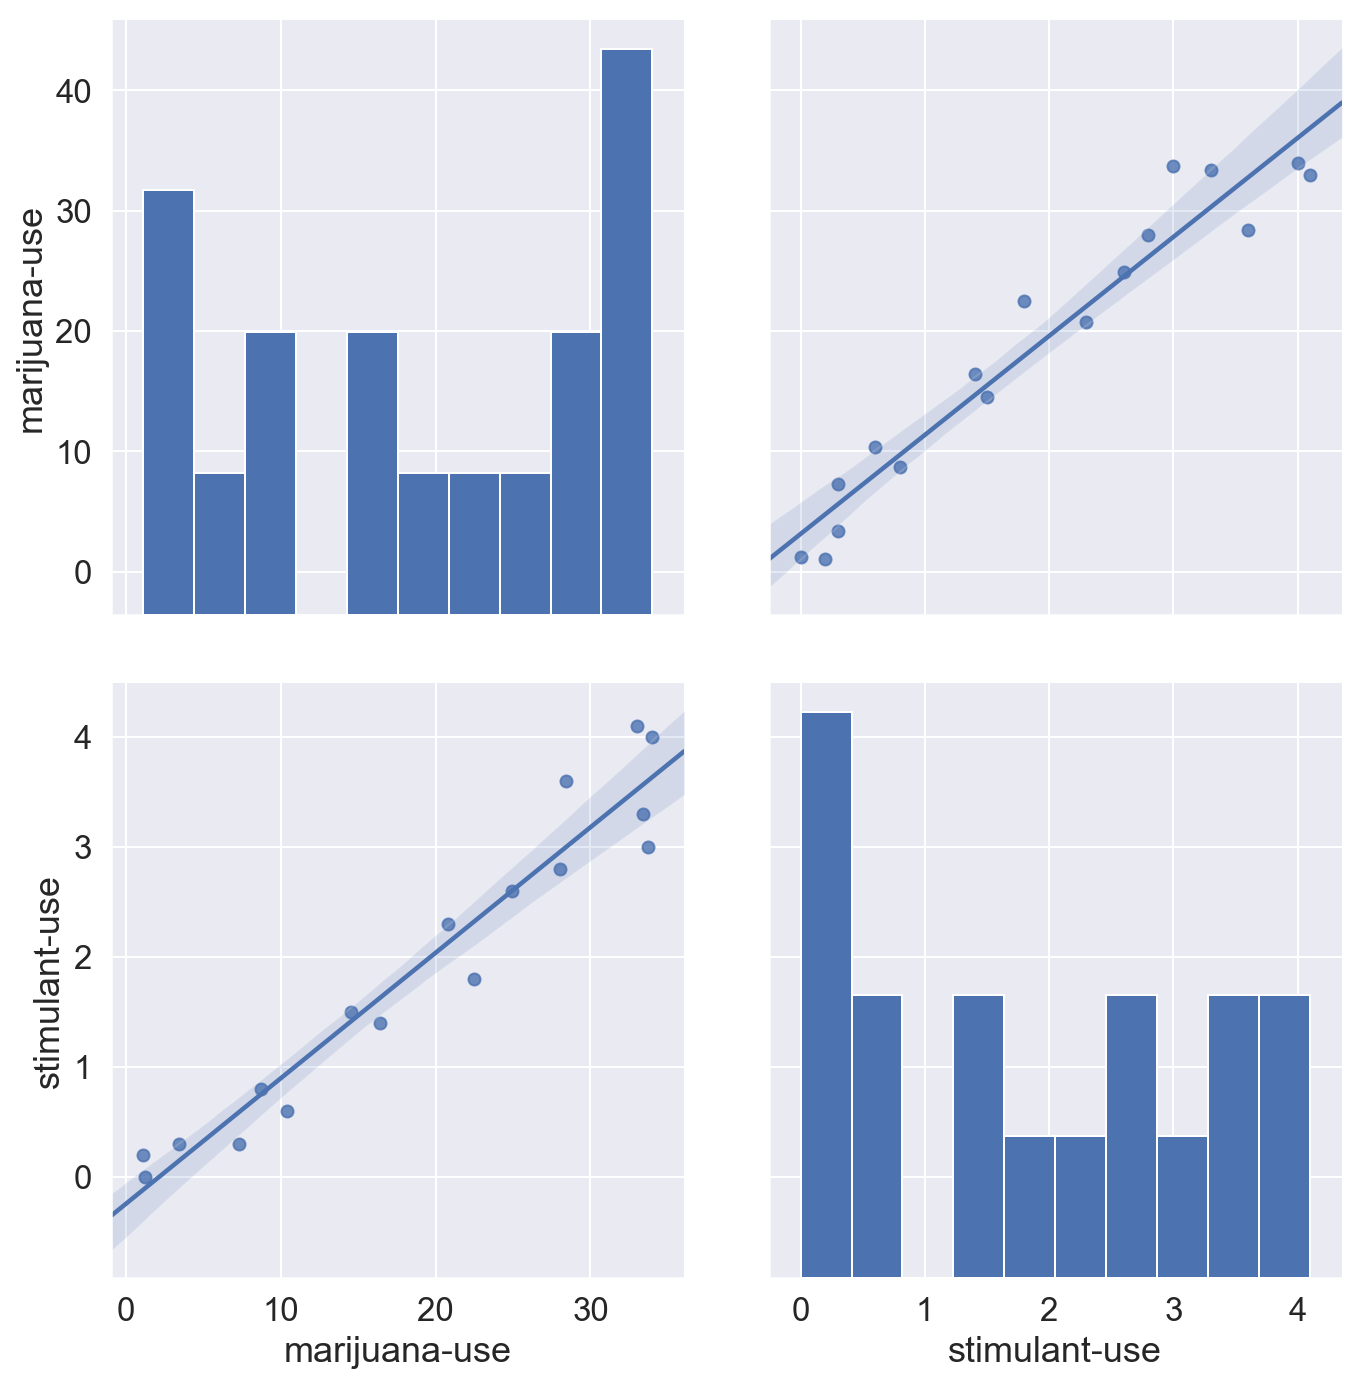

In [95]:
sns.pairplot(dd_use[['marijuana-use', 'stimulant-use']], kind='reg', height=5)
plt.show()

**Report**

A high marijuana/stimulant use for an age group is associated with a high stimulant/marijuana. 
The correlation between these two variable is strong.
Marijuana use rate is approximately ten times the stimulant use rate for a specified age group.


## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

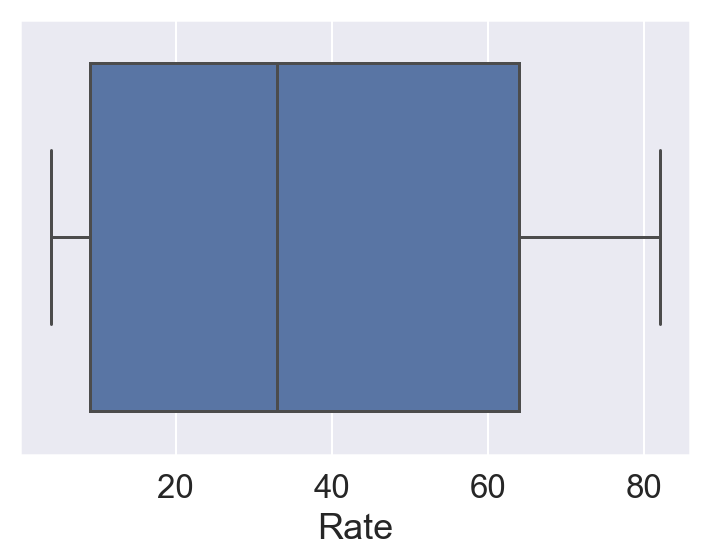

In [96]:
sns.boxplot(data['Rate'], whis=.5)
plt.show()
#Here we have defined outlier as anything that is larger than (3rd quartile + .5*IQR), 
#or lower than (1st Quartiler -  5.*IQR). With this definition of outlier there are no outliers in the
#Rate variable.

#If we did need to remove outliers, we would first establish thresholds beyond which values are considered outliers
#then use these thresholds in a mask to subset the dataframe and assign that to original (or new) dataframe name.
#We could then repeat process of finding mean, median etc.


### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [97]:
data.corr(method='spearman').loc['Verbal','Math']

0.9094125143903471

The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not).

The Spearman correlation between two variables will be high when observations have a similar (or identical for a correlation of 1) rank

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

In [98]:
data['Percentile']=data['Rate'].rank(pct=True)

In [99]:
#California state code is CA
data[data['State']=='CA']

,State,Rate,Verbal,Math,Diff,Percentile
23,CA,51,498,517,-19,0.558824


In [100]:
import scipy

In [101]:
scipy.stats.percentileofscore(data['Rate'], 51, kind='rank')

55.88235294117647

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.

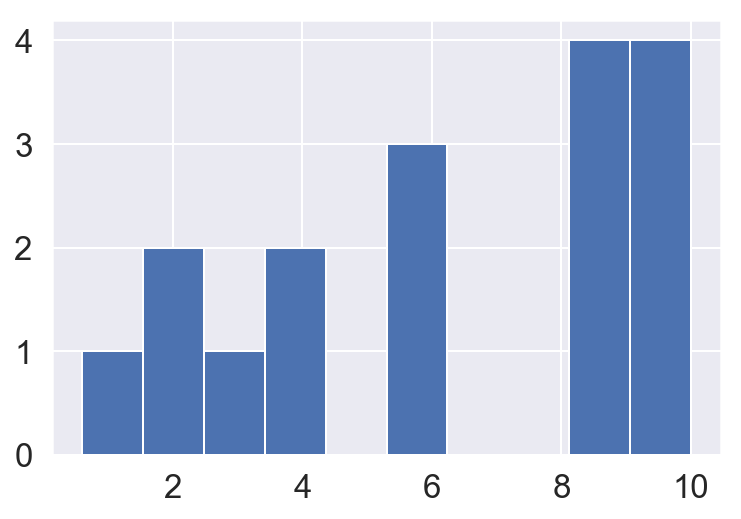

In [102]:
plt.hist(dd_use['pain-releiver-use'])
plt.show()

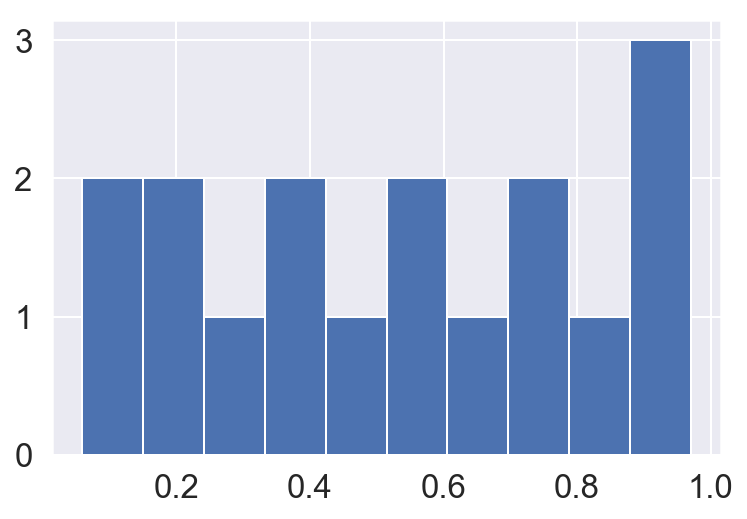

In [103]:
plt.hist(dd_use['pain-releiver-use'].rank(pct=True))
plt.show()

In [ ]:
#Precentile score would be useful for detecting outliers when there are many data points of the same value, 
#for example if 10 values are the same and the next greatest value is one unit away, they are considered close under
#normal metric, with percentile score they could be considered further apart, which may make our analysis clearer.